In [65]:
import pandas as pd   # module to work with data in DataFrames.
import seaborn as sns  # module to plot DataFrames in an easy way
import matplotlib.pyplot as plt
sns.set_context('talk') # try: 'talk', 'poster', 'notebook'
sns.set_style("darkgrid")

In [38]:
df = pd.read_csv('result_final.csv', encoding='utf-8')
df

,Unnamed: 0,test_image,response,resptime,proband,rotation,image,category,sigma
0,0,nature_3_r.jpeg,4,28.686909,Louis,True,nature_3,nature,original
1,1,portrait_9_4.jpeg,1,2.191806,Louis,False,portrait_9,portrait,4
2,2,art_6_20.jpeg,2,4.689927,Louis,False,art_6,art,20
3,3,art_9_12.jpeg,2,3.736233,Louis,False,art_9,art,12
4,4,nature_10_7.jpeg,1,1.395104,Louis,False,nature_10,nature,7
...,...,...,...,...,...,...,...,...,...
2095,2095,art_4_20.jpeg,5,0.700461,Philipp,False,art_4,art,20
2096,2096,portrait_9_7.jpeg,3,2.584903,Philipp,False,portrait_9,portrait,7
2097,2097,nature_6_r_7.jpeg,5,1.550584,Philipp,True,nature_6,nature,7
2098,2098,nature_7_r_20.jpeg,5,1.204270,Philipp,True,nature_7,nature,20


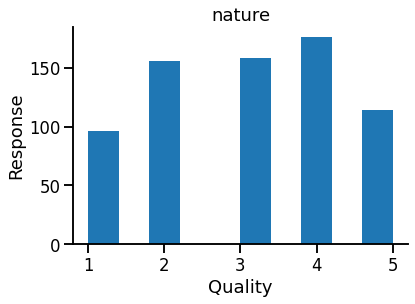

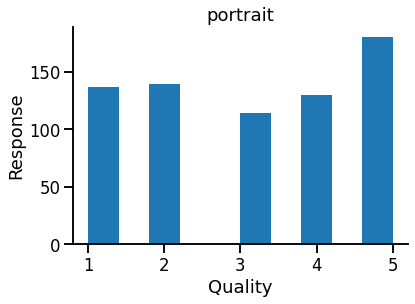

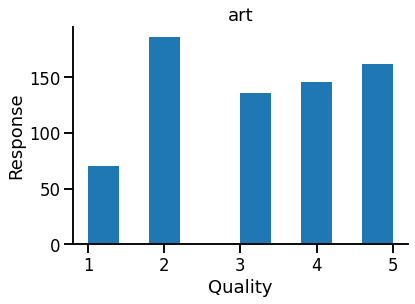

In [46]:
for category in df['category'].unique():
    d = df[df['category'] == category]
    plt.figure()
    plt.hist(d['response'])
    plt.xlabel('Quality')
    plt.ylabel('Response')
    plt.title(category)
    plt.xlim((1, 5))
    sns.despine()

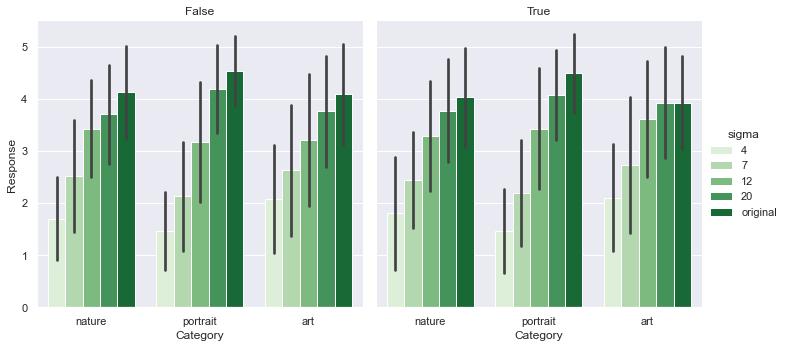

In [79]:
g = sns.catplot(x='category', y='response', data=df, hue='sigma',
                kind='bar', ci='sd', 
                palette='Greens',
               col='rotation', hue_order=['4', '7', '12', '20', 'original'])



g.set_ylabels('Response')
g.set_xlabels('Category')
g.set_titles('{col_name}')

#g.set(ylim = (1, 5))

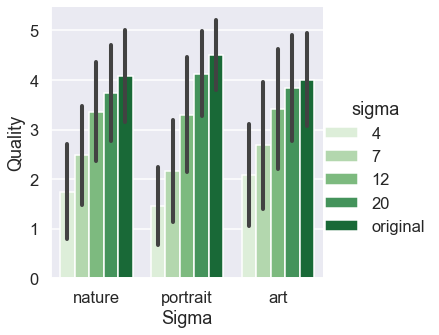

In [67]:
g = sns.catplot(x='category', y='response', data=df, hue='sigma',
                kind='bar', ci='sd', 
                palette='Greens', hue_order=['4', '7', '12', '20', 'original'])



g.set_ylabels('Quality')
g.set_xlabels('Category')
g.set_titles('{col_name}')

#g.set(ylim = (1, 5))

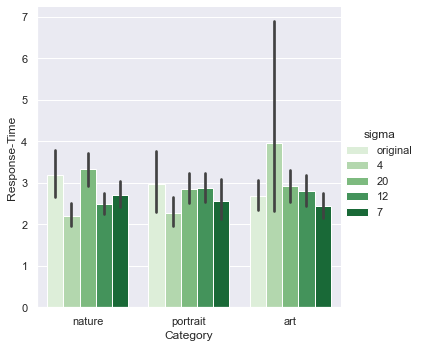

In [80]:
g = sns.catplot(x='category', y='resptime', data=df, hue='sigma',
                kind='bar', 
                palette='Greens')



g.set_ylabels('Response-Time')
g.set_xlabels('Category')
g.set_titles('{col_name}')

#g.set(ylim = (1, 5))

<AxesSubplot:xlabel='category', ylabel='resptime'>

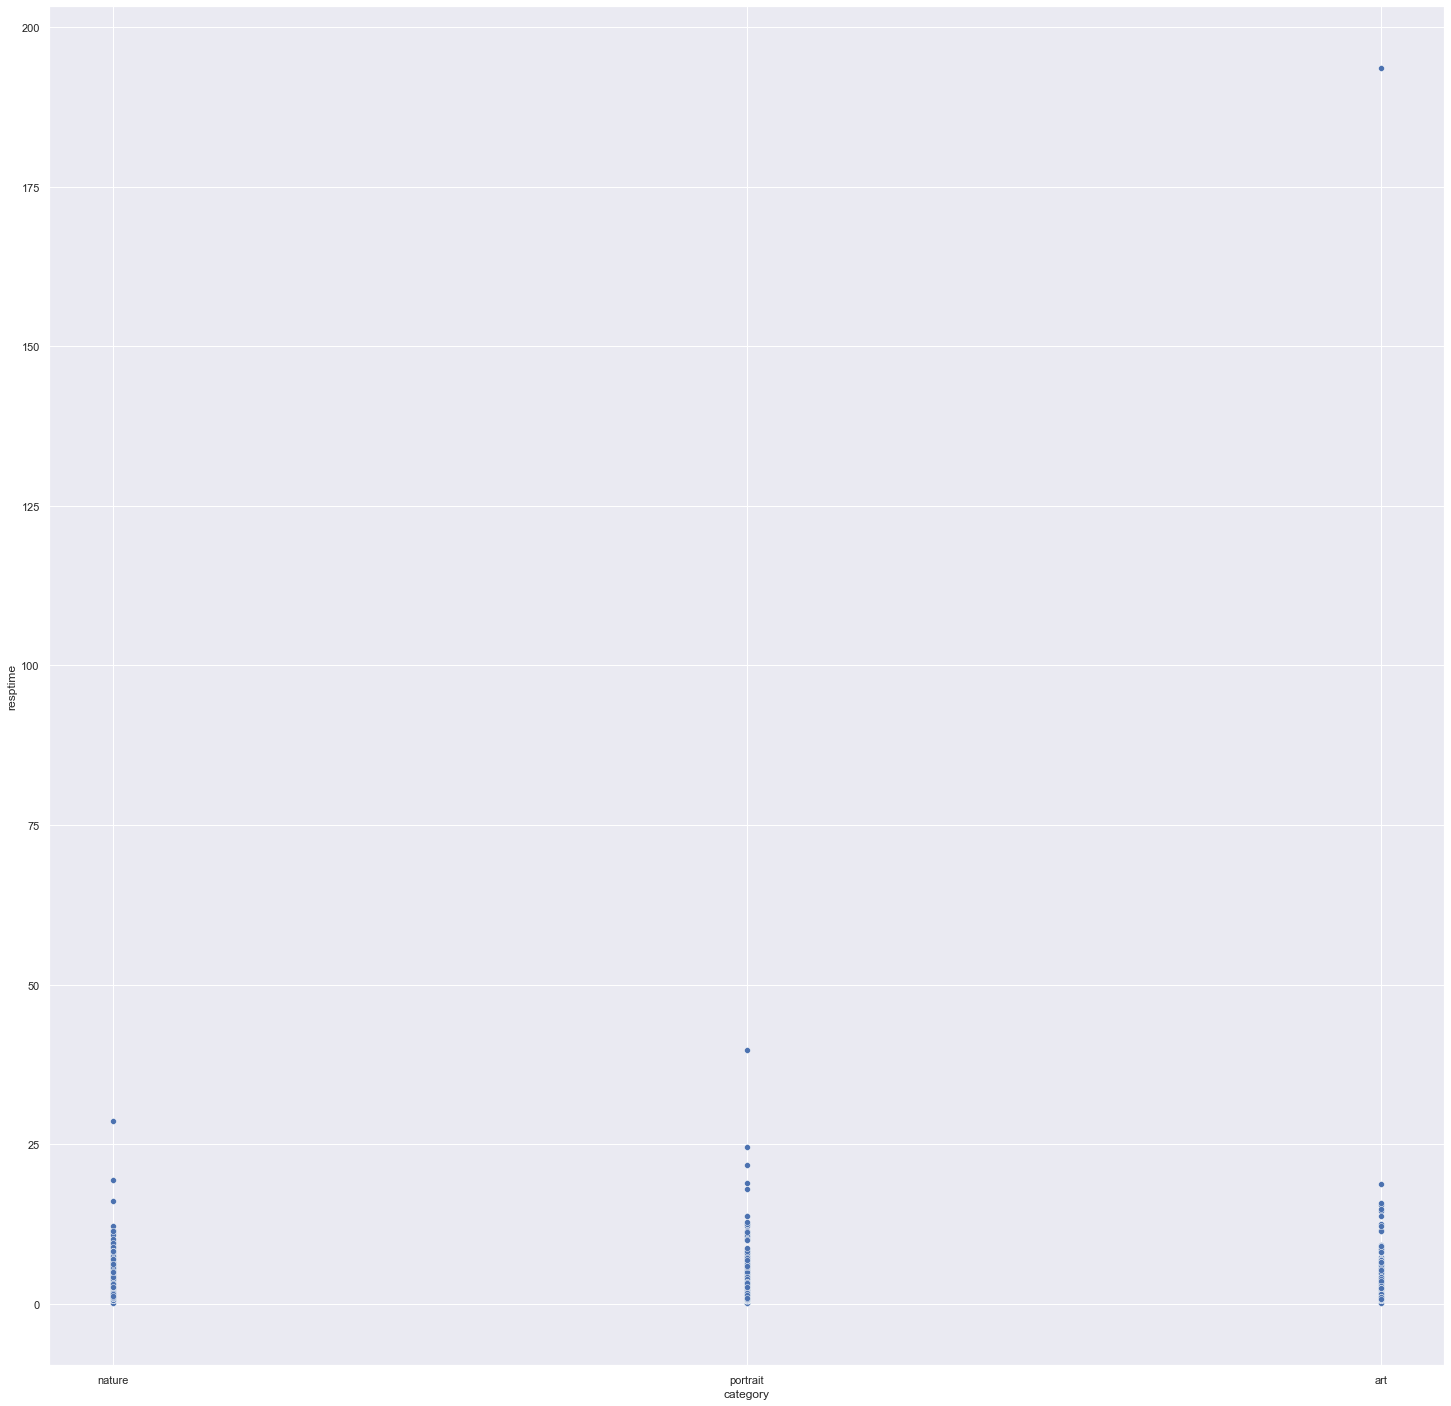

In [91]:
sns.scatterplot(data=df, x='category', y='resptime')